# 数组广播机制

In [2]:
import numpy as np

正常的加法：

In [3]:
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]])
b = np.array([[ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2],
              [ 0, 1, 2]])
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

将 b 的值变成一维的 [0,1,2] 之后的加法：

In [4]:
b = np.array([0,1,2])

a + b



array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

结果一样，虽然两个数组的维数不一样，但是 Numpy 检测到 b 的维度与 a 的维度匹配，所以将 b 扩展为之前的形式，得到相同的形状。

对于更高维度，这样的扩展依然有效。

如果我们再将 a 变成一个列向量呢？


In [5]:
a = np.array([0,10,20,30])
a.shape = 4,1
a

array([[ 0],
       [10],
       [20],
       [30]])

In [6]:
b

array([0, 1, 2])

In [7]:
a+b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

可以看到，虽然两者的维度并不相同，但是Numpy还是根据两者的维度，自动将它们进行扩展然后进行计算。

对于 Numpy 来说，维度匹配当且仅当：

    维度相同
    有一个的维度是1

匹配会从最后一维开始进行，直到某一个的维度全部匹配为止，因此对于以下情况，Numpy 都会进行相应的匹配：

匹配成功后，Numpy 会进行运算得到相应的结果。

当然，如果相应的维度不匹配，那么Numpy会报错：

In [9]:
a = np.array([0,10,20,30])
a.shape

(4,)

In [11]:
b.shape

(3,)

In [12]:
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

将 a 转换为列向量，还是可以计算出结果：


In [13]:
a[:, np.newaxis] + b



array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

## 例子

In [14]:
x = np.linspace(-.5,.5, 21)



In [15]:
y = x[:, np.newaxis]



In [16]:
x.shape

(21,)

In [17]:
y.shape

(21, 1)

先形成一个 21 乘 21 的网格，再计算网格到原点的距离：

In [20]:
radius = np.sqrt(x ** 2 + y ** 2)



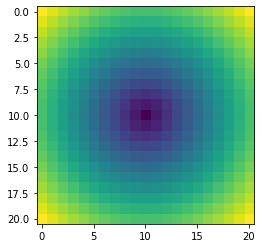

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(radius)

